In [1]:
import vector
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from scipy.optimize import curve_fit
from scipy.stats import norm, landau

In [2]:
raw_file_path = "/global/cfs/cdirs/m2616/avencast/Quantum_Entanglement/workspace_20250209_sig/results/pi_pi/ml_export/pi_pi_recon_particles.pkl"
with open(raw_file_path, "rb") as f:
    data = pickle.load(f)
test_num = -1
vis1_1 = data["tau_p_child1"][:test_num]
vis1_2 = data["tau_p_child2"][:test_num]
vis1_3 = data["tau_p_child3"][:test_num]
vis2_1 = data["tau_m_child1"][:test_num]
vis2_2 = data["tau_m_child2"][:test_num]
vis2_3 = data["tau_m_child3"][:test_num]
met = data["MET"][:test_num]
truth_nu1 = data["truth_nu_p"][:test_num]
truth_nu2 = data["truth_nu_m"][:test_num]
tau_1 = data["truth_tau_p"][:test_num]
tau_2 = data["truth_tau_m"][:test_num]
vis1 = vis1_1 + vis1_2 + vis1_3
vis2 = vis2_1 + vis2_2 + vis2_3

In [3]:
# Get \Detal R between visible particles and invisible particles
delta_R_1 = vis1.deltaR(truth_nu1)
delta_R_2 = vis2.deltaR(truth_nu2)
p_tau_1 = tau_1.p
p_tau_2 = tau_2.p

In [4]:
range_num = int((200 - 25)/5)
print(range_num)

35


In [7]:
def full_model(deltaR, mu, sigma, A, B, w, h):
    gauss = norm.pdf(deltaR, mu, sigma)
    lan = landau.pdf(deltaR, A, B)
    
    return w * gauss + h * lan

In [5]:
param_dics = {}

0
1
2
3
4
5
6


/tmp/ipykernel_2286760/1193426858.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.01, 0.04, 0.02, 100, 100])


7
8


/tmp/ipykernel_2286760/1193426858.py:20: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.01, 0.04, 0.02, 100, 20000])


9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


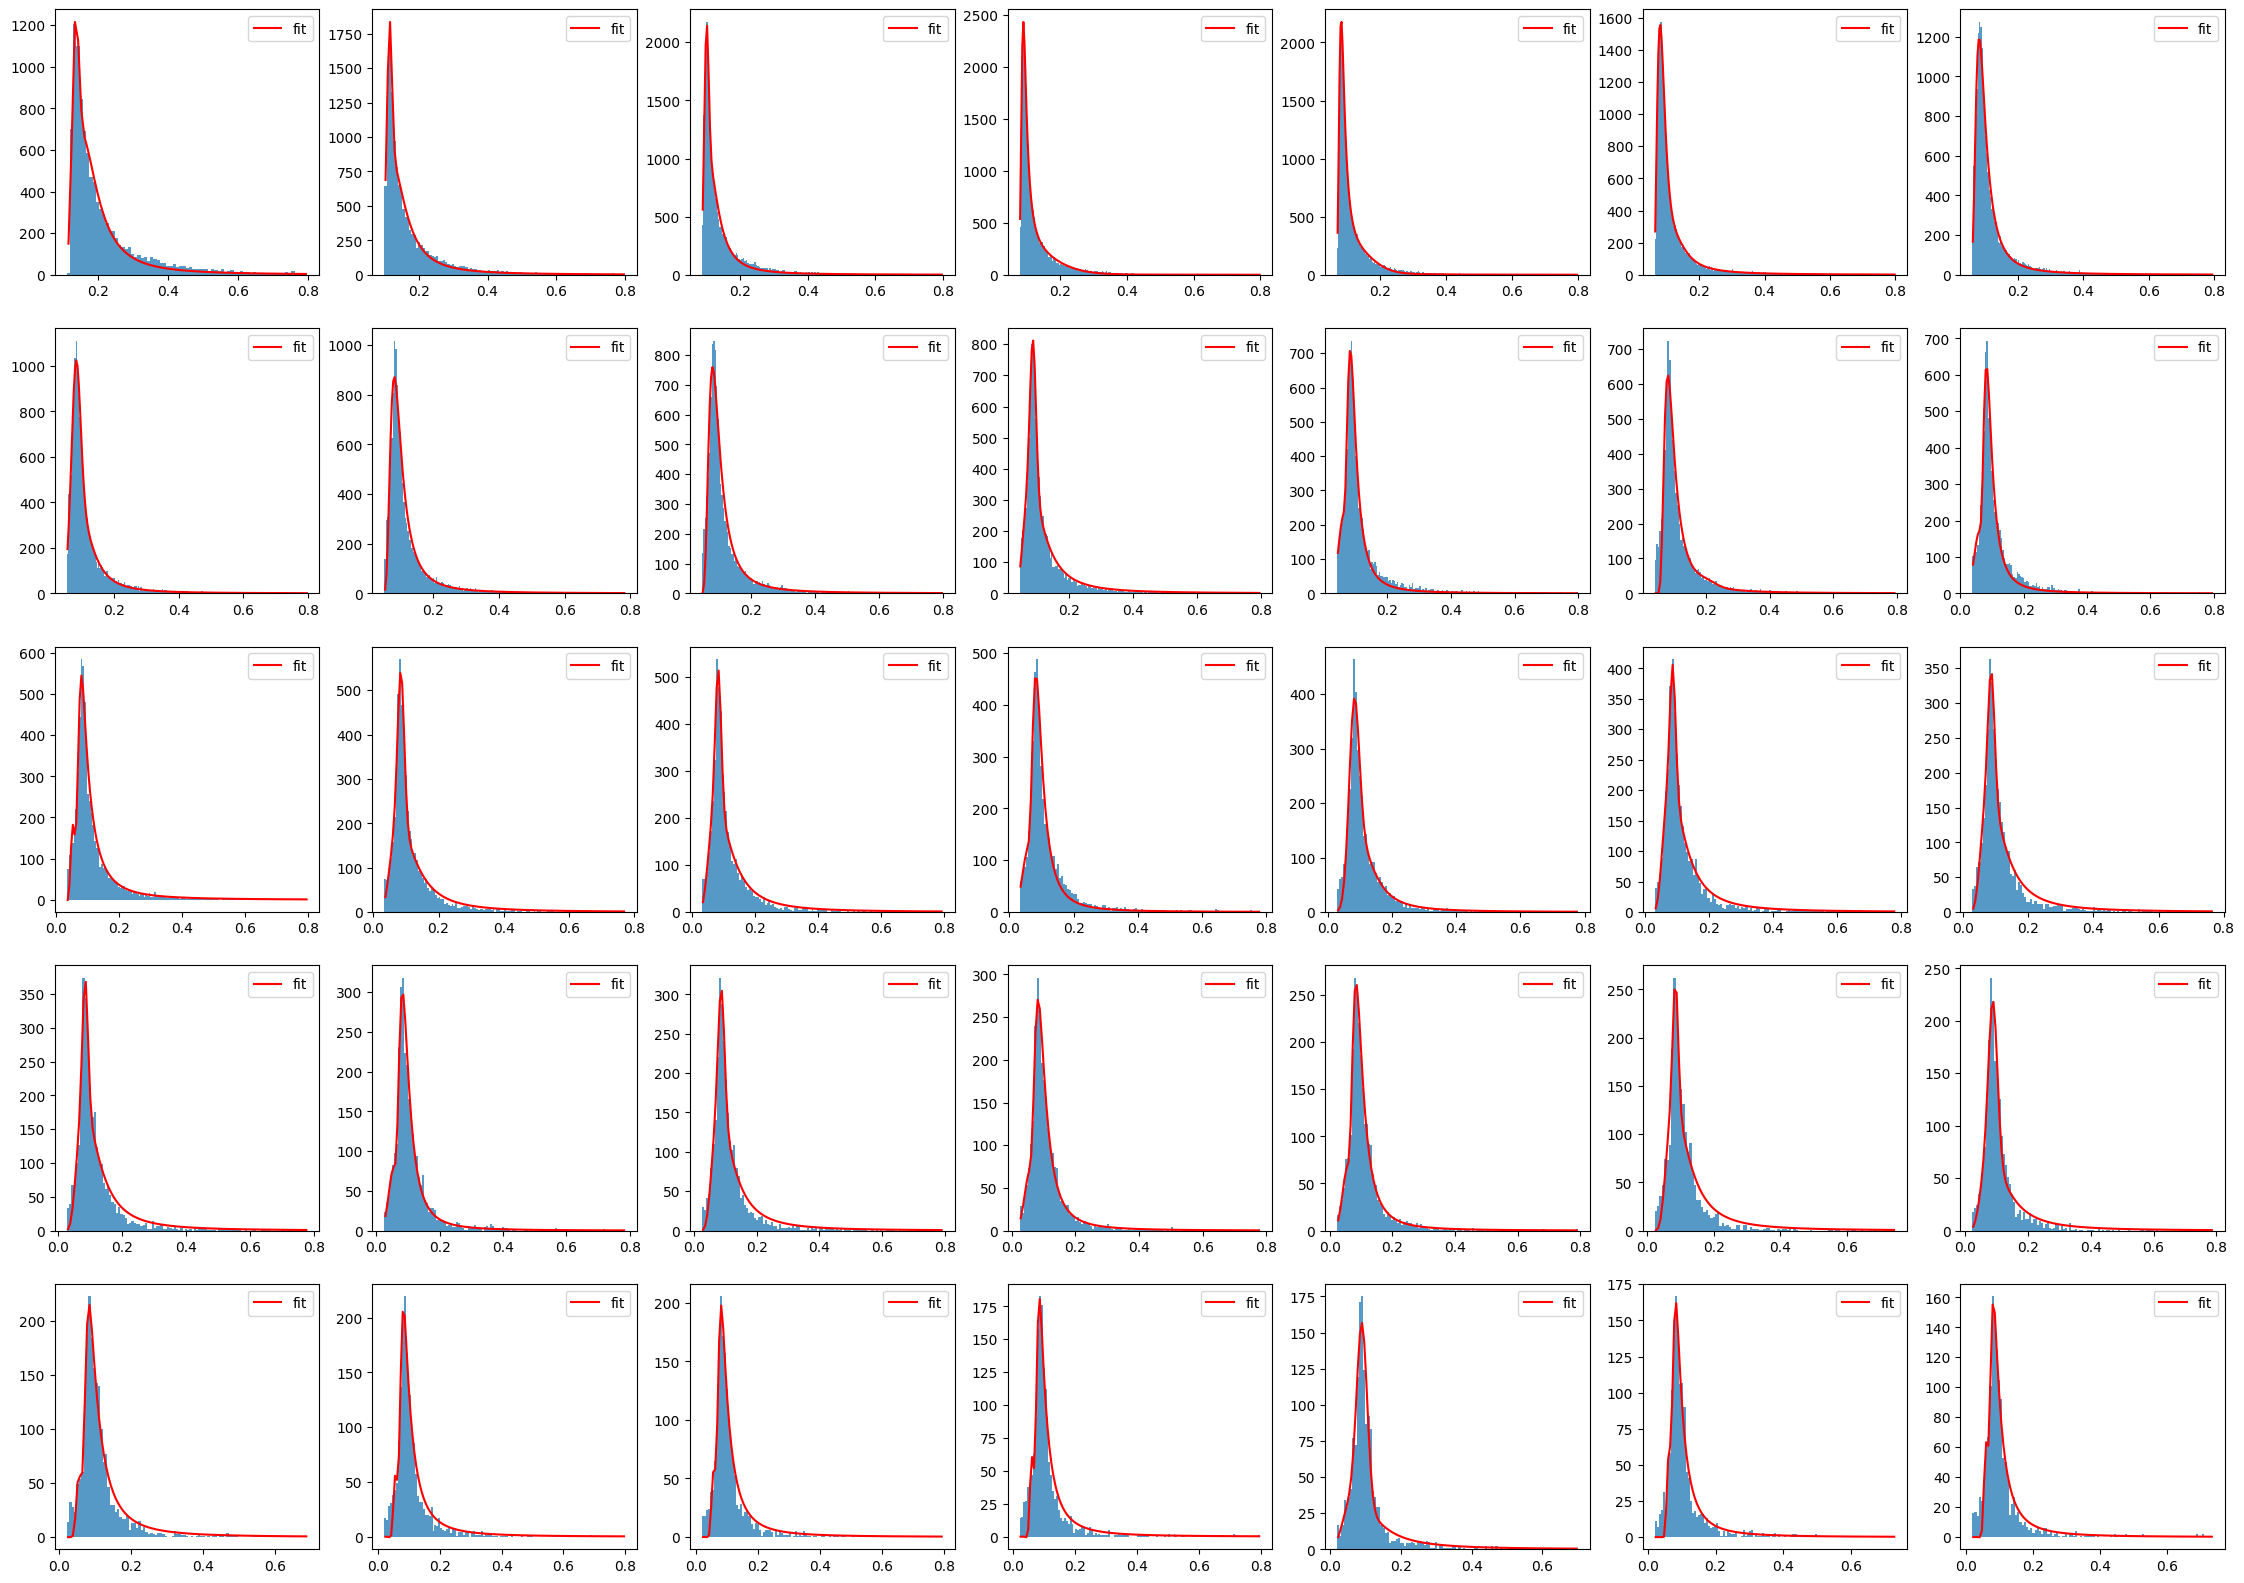

In [16]:
# Create a figure and a 5x7 grid of subplots
fig, axs = plt.subplots(5, 7, figsize=(28, 20))
tau1_dics = {}
for r in range(range_num):
    dics = {}
    p_max = 25 + (r+1)*5
    p_min = 25 + r*5
    mask = (p_tau_1 > p_min) & (p_tau_1 < p_max)
    mask = mask & (delta_R_1 < 0.8)
    temp_p_tau_1 = p_tau_1[np.where(mask)]
    temp_delta_R_1 = delta_R_1[np.where(mask)]
    hist, bin_edges = np.histogram(temp_delta_R_1, bins="auto")
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    print(r)
    if r != 6 and r != 8 and r != 9 and r != 11 and r != 13 and r != 14 and r != 17 and r < 28:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.1, 0.1, 0.1, 0.1, 1000, 1000])
    elif r == 6:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.01, 0.04, 0.02, 100, 100])
    elif r == 8 or r == 9:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.01, 0.04, 0.02, 100, 20000])
    elif r == 11 or r == 13  or r == 14:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.01, 0.04, 0.02, 100, 100])
    elif r == 17:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.01, 0.04, 0.02, 1000, 100])
    elif r >= 28:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.01, 0.04, 0.02, 100, 20000])
    
    
    plt.subplot(5, 7, r+1)
    plt.hist(temp_delta_R_1, bins="auto", density=False, alpha=0.75)
    plt.plot(bin_centers, full_model(bin_centers, *popt), 'r-', label='fit')
    plt.legend()
    dics["p_max"] = p_max
    dics["p_min"] = p_min
    dics["mu"] = popt[0]
    dics["sigma"] = popt[1]
    dics["A"] = popt[2]
    dics["B"] = popt[3]
    dics["w"] = popt[4]
    dics["h"] = popt[5]
    tau1_dics.update({str(p_max):dics})
plt.show()
param_dics["tau1"] = tau1_dics
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


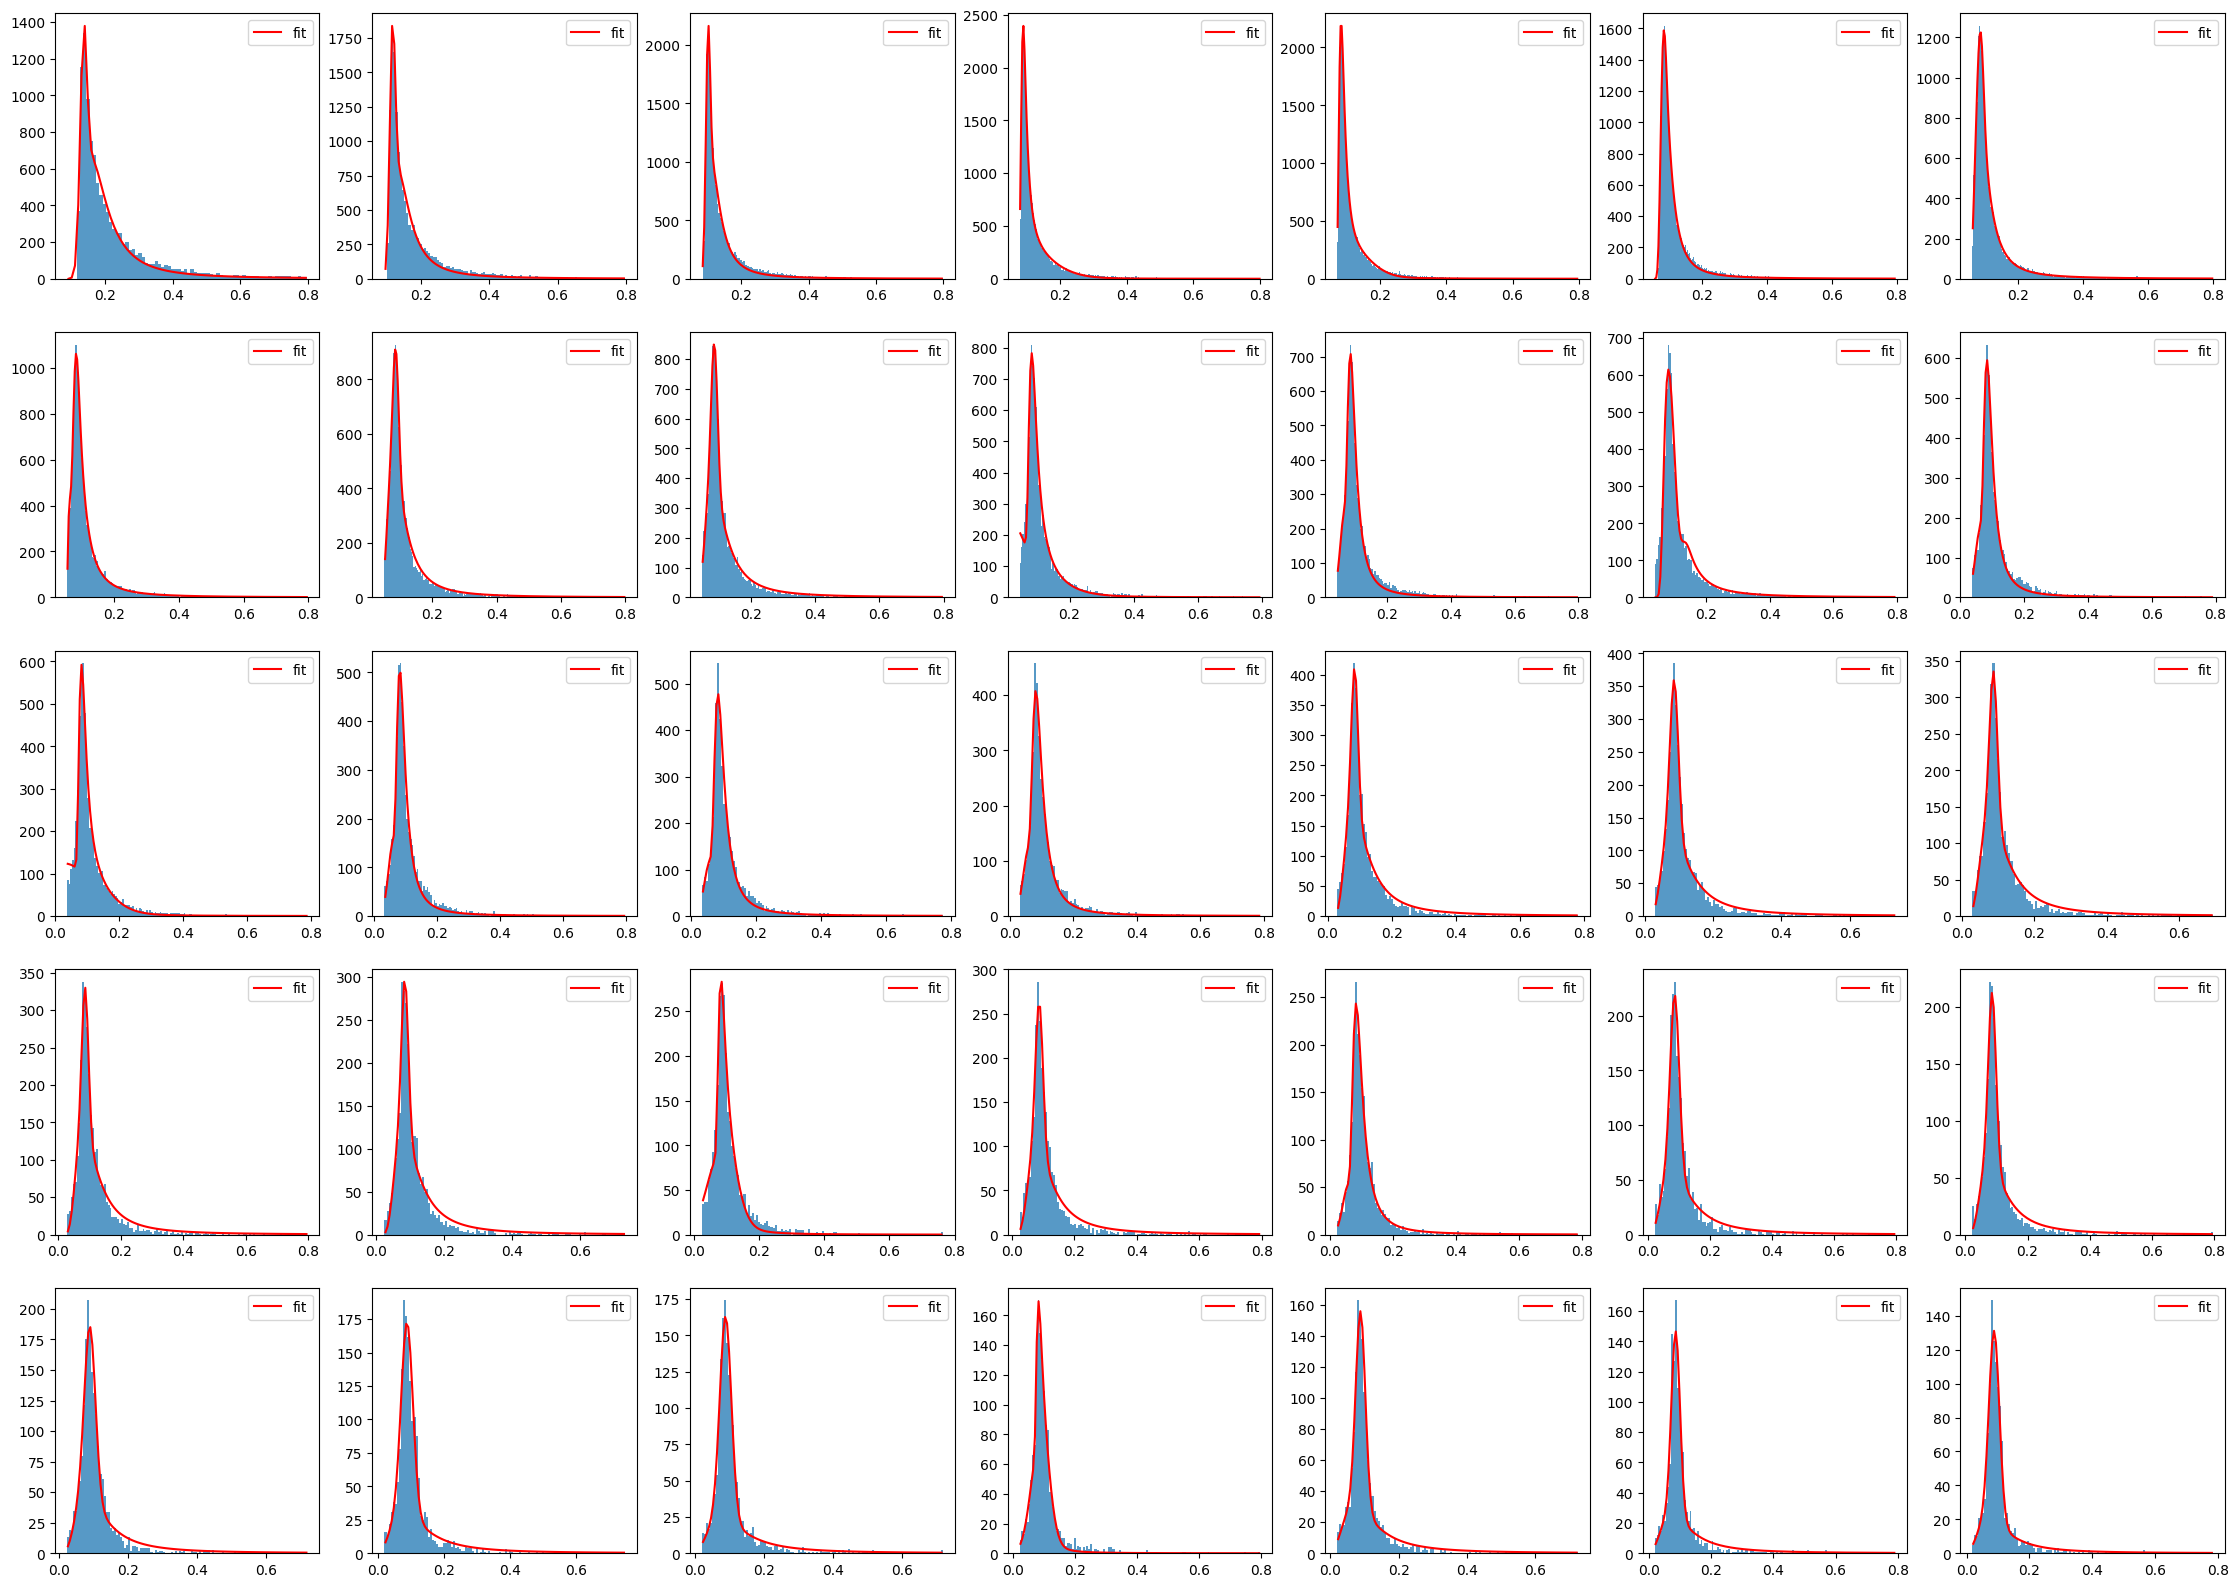

In [57]:
fig, axs = plt.subplots(5, 7, figsize=(28, 20))
tau2_dics = {}
for r in range(range_num):
    dics = {}
    p_max = 25 + (r+1)*5
    p_min = 25 + r*5
    mask = (p_tau_2 > p_min) & (p_tau_2 < p_max)
    mask = mask & (delta_R_2 < 0.8)
    temp_p_tau_2 = p_tau_2[np.where(mask)]
    temp_delta_R_2 = delta_R_2[np.where(mask)]
    hist, bin_edges = np.histogram(temp_delta_R_2, bins="auto")
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    print(r)
    if r != 1 and r != 2 and r != 6 and r != 7 and r != 10 and r != 11 and r != 13 and r != 15 and r != 17 and r!=16 and r != 23 and r < 28:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.1001, 0.1, 0.1, 0.1, 1000, 1000])
    elif r ==6 or r == 7:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.05, 0.01, 0.04, 0.02, 100, 2000])
    elif r == 1 :
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.1, 0.04, 0.02, 150, 300])
    elif r == 2 :
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.1, 0.04, 0.02, 100, 300])
    elif r == 10 or r == 11:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.2, 0.1, 0.04, 0.02, 100, 1000])
    elif  r == 13  or r == 15 or r == 16 or r == 23:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.01, 0.04, 0.02, 100, 100])
    elif r == 17 :
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.03, 0.01, 0.04, 0.02, 1000, 100])
    elif r >= 28:
        popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.1, 0.17, 0.04, 0.02, 1000, 100])
    
    
    plt.subplot(5, 7, r+1)
    plt.hist(temp_delta_R_2, bins="auto", density=False, alpha=0.75)
    plt.plot(bin_centers, full_model(bin_centers, *popt), 'r-', label='fit')
    plt.legend()
    dics["p_max"] = p_max
    dics["p_min"] = p_min
    dics["mu"] = popt[0]
    dics["sigma"] = popt[1]
    dics["A"] = popt[2]
    dics["B"] = popt[3]
    dics["w"] = popt[4]
    dics["h"] = popt[5]
    tau2_dics.update({str(p_max):dics})
plt.show()
param_dics["tau2"] = tau1_dics

In [59]:
print(param_dics)


{'tau1': {'30': {'p_max': 30, 'p_min': 25, 'mu': 0.13369470130198197, 'sigma': 0.009209730424526066, 'A': 0.16871071489286701, 'B': 0.030862254315175773, 'w': 18.726398470985764, 'h': 71.38660329914559}, '35': {'p_max': 35, 'p_min': 30, 'mu': 0.11545240603837786, 'sigma': 0.00685389490049623, 'A': 0.13799997453581261, 'B': 0.026534494402250048, 'w': 19.53920052599935, 'h': 74.10895273921832}, '40': {'p_max': 40, 'p_min': 35, 'mu': 0.10043532062948882, 'sigma': 0.006329104781623685, 'A': 0.1187736660626587, 'B': 0.0189061563651, 'w': 22.20951732983586, 'h': 61.85599526668226}, '45': {'p_max': 45, 'p_min': 40, 'mu': 0.04036441020856205, 'sigma': 0.10538963708693923, 'A': 0.09249648686278465, 'B': 0.007332370754129487, 'w': 79.36033564261398, 'h': 55.95679355297774}, '50': {'p_max': 50, 'p_min': 45, 'mu': 0.11737468317376065, 'sigma': 0.059382734121100206, 'A': 0.08610261895212164, 'B': 0.008171987676070646, 'w': 23.415733454056074, 'h': 59.495355383135525}, '55': {'p_max': 55, 'p_min': 5

In [58]:
import pickle
with open("/global/cfs/projectdirs/m2616/baihong/MMC/param_dics.pkl", "wb") as f:
    pickle.dump(param_dics, f)

In [100]:
# Convert integer keys to strings
np.savez("/global/cfs/projectdirs/m2616/baihong/MMC/params_pipi", **param_dics)

In [67]:
_0_delta_R_1 = delta_R_1[delta_R_1 < 0.6]
_0_p_tau_1 = p_tau_1[delta_R_1 < 0.6]
_1_p_tau_1 = _0_p_tau_1[np.where((_0_p_tau_1 > 25))]
_1_delta_R_1 = _0_delta_R_1[np.where((_0_p_tau_1 > 25))]

In [68]:
hist, bin_edges = np.histogram(_1_delta_R_1, bins="auto")

In [69]:
print(np.sum(hist))

286480


In [70]:
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
hist = hist / np.sum(hist)

In [64]:
def full_model(deltaR, mu, sigma, A, B, w, h):
    gauss = norm.pdf(deltaR, mu, sigma)
    lan = landau.pdf(deltaR, A, B)
    
    return w * gauss + h * lan



In [71]:
popt, pcov = curve_fit(full_model, bin_centers, hist, p0=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [54]:
print(pcov)
print()

[[5.50858512e-07 3.38874988e-07 6.81560380e-08]
 [3.38874988e-07 4.34910642e-07 8.75107530e-08]
 [6.81560380e-08 8.75107530e-08 4.07099048e-08]]



[ 0.09003605  0.02448887  0.06055581  0.00708922  0.00145745 -0.00016404]


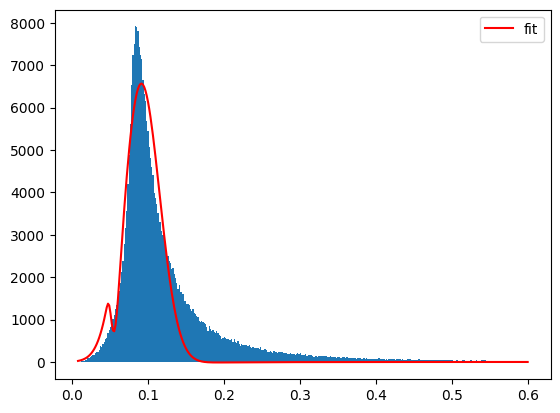

In [72]:
print(popt)
plt.hist(_1_delta_R_1, bins="auto", density=False)
plt.plot(bin_centers, 286480*full_model(bin_centers, *popt), 'r-', label='fit')
plt.legend()